* 习题一<br>
1.pickle模块保存数据

In [38]:
import numpy as np
import pickle
import pandas as pd
a=np.random.standard_normal((1000000,5)).round(4)
path="H:\data\\"
#pickle存入数据
pkl_file = open(path + 'data.pkl', 'wb')
print("pickle存入数据所需时间:")
%time pickle.dump(a, pkl_file)
pkl_file.close()
#pickle读取数据
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading
print("pickle读取数据所需时间:")
%time b = pickle.load(pkl_file)


pickle存入数据所需时间:
Wall time: 228 ms
pickle读取数据所需时间:
Wall time: 60.5 ms


2.csv保存数据

In [50]:
%%time
import numpy as np
import pickle
import pandas as pd
a=np.random.standard_normal((1000000,5)).round(4)
path="H:\data\\"
#写入数据到csv
'''
csv的write只能写String类型的，所以把数据拼接成String后写入
'''
csv_file = open(path + 'data.csv', 'w')  # open file for writing
t = pd.date_range(start='2014/1/1', periods=1000000, freq='H')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()
print("csv存入数据所需时间:")


csv存入数据所需时间:
Wall time: 9.06 s


In [31]:
%%time
import numpy as np
import pickle
import pandas as pd
path="H:\data\\"
#从csv读取数据
'''
读取数据时用csv.reader(file)方法获得csv_reader对象，迭代csv_reader对象获得数据
'''
csv_file = open(path + 'data.csv', 'r')  # open file for reading
csv_reader=csv.reader(csv_file)
for i,rows in enumerate(csv_reader):
    if(i<=5):
        print(rows)
    else:
        break
csv_file.close()
print("从csv读取数据的时间:")

['date', 'no1', 'no2', 'no3', 'no4', 'no5']
['2014-01-01 00:00:00', '-0.051100', '0.416400', '0.909300', '1.689000', '0.070900']
['2014-01-01 01:00:00', '-1.194700', '0.147900', '1.916400', '1.272000', '0.908800']
['2014-01-01 02:00:00', '0.809500', '-0.347700', '-0.044700', '1.038400', '1.210600']
['2014-01-01 03:00:00', '0.919300', '0.641700', '-1.499200', '0.042600', '-0.127600']
['2014-01-01 04:00:00', '0.089100', '-1.522900', '-1.242400', '0.298100', '-0.689500']
从csv读取数据的时间:
Wall time: 2 ms


3.numpy的save和load方法

In [28]:
import numpy as np
path="h:\data\\"
data = np.random.standard_normal((1000000, 2)).round(4)
print("numpy 保存数据的时间:")
%time np.save(path + 'array', data)  # suffix .npy is added
print("numpy 读取数据的时间:")
%time np.load(path + 'array.npy')

numpy 保存数据的时间:
Wall time: 7.01 ms
numpy 读取数据的时间:
Wall time: 11 ms


array([[ 1.0863,  1.273 ],
       [-1.7685, -0.676 ],
       [-1.1727, -1.0952],
       ..., 
       [ 0.037 ,  0.9062],
       [-0.4594, -0.1186],
       [ 0.5382, -2.4338]])

* 习题二<br>
1.pandas 保存数据到csv文件

In [58]:
%%time
import numpy as np
import pandas as pd
path="h:\data\\"
data = np.random.standard_normal((1000000, 5)).round(4)
#存入数据到csv文件
csv_file = open(path + 'pandas_.csv', 'w')  # open file for writing
for i in range(len(data)):#按照一行一行保存，每行拼接成字符串
    s = '%f,%f,%f,%f,%f\n' % (data[i][0],data[i][1], data[i][2],data[i][3], data[i][4])
    csv_file.write(s)
csv_file.close()
print("保存数据到csv的时间:")

保存数据到csv的时间:
Wall time: 4.78 s


In [17]:
import numpy as np
import pandas as pd
import csv
path="h:\data\\"
#从csv文件读取数据
print("从csv读取数据的时间:")
%time csv_file = open(path + 'pandas_.csv', 'r')  # open file for reading
csv_reader=csv.reader(csv_file)
#迭代csv_Reader对象获得数据
for i,rows in enumerate(csv_reader):
    if(i<=5):
        print(rows)
csv_file.close()

从csv读取数据的时间:
Wall time: 1 ms
['-0.195300', '0.594600', '-0.596900', '1.734800', '-0.952900']
['-2.542400', '0.975000', '1.402300', '-0.213500', '-1.137800']
['0.476700', '1.784000', '-0.796500', '1.282400', '-0.413300']
['-0.706400', '-1.425100', '1.955700', '0.780900', '1.228200']
['0.102900', '1.936100', '0.899500', '0.021800', '-0.427600']
['0.291300', '0.285000', '-0.976000', '0.482800', '-0.231000']


2.sqllite3 数据库 保存 读取数据

In [31]:
import sqlite3 as sq3
path="h:\data\\"
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'
con = sq3.Connection("h:data\pandas__sql" + '.db')
con.execute(query)
data = np.random.standard_normal((1000000, 5)).round(4)
print("插入数据到sqllite的时间:")
%time con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()
print("从sqllite读取数据所需要的时间:")
%time temp = con.execute('SELECT * FROM numbers').fetchall()

插入数据到sqllite的时间:
Wall time: 8.46 s
从sqllite读取数据所需要的时间:
Wall time: 1.67 s


3.pytables保存 读取数据

In [111]:
%%time
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
path="h:\data\\"
filename = path + 'tab_.h5'
h5 = tb.open_file(filename, 'w')
rows=1000000
data = np.random.standard_normal((rows, 5)).round(4)
row_des = {
    'No1': tb.Float64Col(pos=1),
    'No2': tb.Float64Col(pos=2),
    'No3': tb.Float64Col(pos=3),
    'No4': tb.Float64Col(pos=4),
    'No5': tb.Float64Col(pos=5)
    }
filters = tb.Filters(complevel=0)  # no compression
#创建table
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Float',expectedrows=rows, filters=filters)
#往table中保存数据
pointer = tab.row
for i in range(rows):
    pointer['No1'] = data[i,0]
    pointer['No2'] = data[i,1]
    pointer['No3'] = data[i,2] 
    pointer['No4'] = data[i,3]
    pointer['No5'] = data[i,4] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()
print(tab)
print(tab[:3])
h5.close()
print("保存数据到pytables的时间:")



/ints_floats (Table(1000000,)) 'Integers and Float'
[(-0.2234, -0.2978, -1.1501,  1.1521, -1.2323)
 ( 0.4272,  0.6614, -1.8779, -2.3489,  0.526 )
 (-0.7836,  0.3051, -0.6255, -0.0739, -1.9762)]
保存数据到pytables的时间:
Wall time: 2.15 s


In [143]:
%%time
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
path="h:\data\\"
filename = path + 'tab_.h5'
'''
tb.open_file(filename, mode='r', title='', root_uep='/', filters=None, **kwargs)
得到文件对象后，并不知道如何得到自己创建那个结点的表，
ppt上也不说，h5对象的文档里也不说怎么获取结点对应的表，全靠pycharm的自动提示找的get_node方法。。。恩，百度上也没有
'''
h5 = tb.open_file(filename, 'r')
tab=h5.get_node("/ints_floats")
print(tab[:3])
h5.close()
print("从pytable读取数据的时间:")

[(-0.2234, -0.2978, -1.1501,  1.1521, -1.2323)
 ( 0.4272,  0.6614, -1.8779, -2.3489,  0.526 )
 (-0.7836,  0.3051, -0.6255, -0.0739, -1.9762)]
从pytable读取数据的时间:
Wall time: 9.01 ms


* 习题三<br>
1.sqllite直方图 散点图


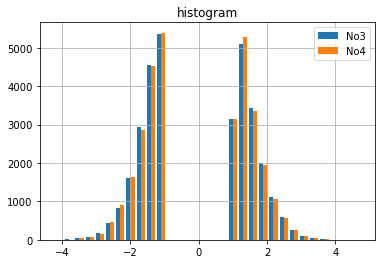

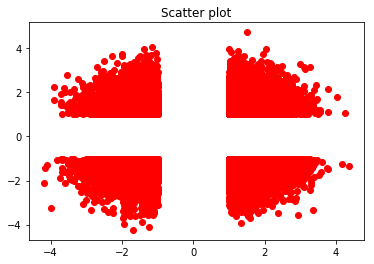

In [192]:
import sqlite3 as sq3
import matplotlib.pyplot as plt
con = sq3.Connection("h:\data\pandas__sql.db")
#通过sql语句控制过滤条件
#sql语句里可以直接abs，其他的似乎都不行。。。
data = con.execute('SELECT * FROM numbers WHERE abs(No1) > 1 AND abs(No2) > 1 ').fetchall()
#这里也不能abs
res=np.array([(row[1],row[2]) for row in data if (((row[1]>1) | (row[1]<-1))& ((row[2]>1)|(row[2]<-1)))])
#绘制直方图
plt.hist(res, bins=30)
plt.grid(True)
plt.title("histogram")
plt.legend(["No3","No4"])
plt.show()
#绘制散点图
plt.plot(res.T[0], res.T[1], 'ro')
plt.title('Scatter plot')
plt.show()

2.hdf5 直方图 散点图

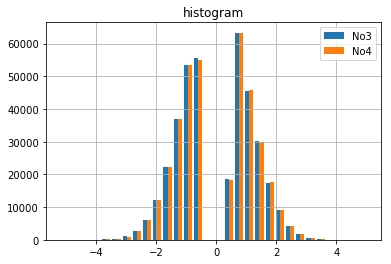

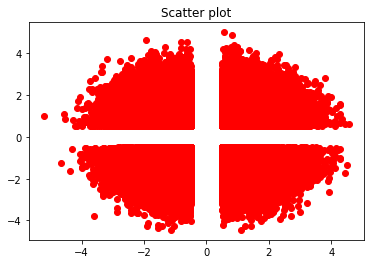

In [188]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
path="h:\data\\"
filename = path + 'tab_.h5'
h5 = tb.open_file(filename, 'r')
#得到对应节点的表
tab=h5.get_node("/ints_floats")
#筛选数据表中符合要求的数据，并构造成nparray
#注意这里的tab.where里的语句不能用abs(No3)>0.5,应该是不支持的，亲测
res=np.array([(row['No3'], row['No4']) for row in tab.where('((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -0.5) | (No4 > 0.5))')])
#对数据绘图
plt.hist(res, bins=30)
plt.grid(True)
plt.title("histogram")
plt.legend(["No3","No4"])
plt.show()

#绘制散点图
'''
plot里穿的参数第一个是x向量,第二个是y向量
注意这里的res一开始的shape是100万*2
而我们要把它的No3的值作为x轴，No4的值作为y轴
所以要把每个列当成一个向量，reshape成2*100万的矩阵
这里的T也就是转置，转置之后取第一个行向量和第二个行向量
'''
plt.plot(res.T[0], res.T[1], 'ro')
plt.title('Scatter plot')
plt.show()